In [14]:
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
datadir = '/media/nknezek/compute_storage/computed_solutions_Fischer2015/'
all_data = csv.writer(open(datadir+'all_data.csv','w'))
ri05p_data = csv.writer(open(datadir+'ri05p_data.csv','w'))
ri05p_l6000K_data = csv.writer(open(datadir+'ri05p_l6000K_data.csv','w'))
ri10p_data = csv.writer(open(datadir+'ri10p_data.csv','w'))

In [16]:
# percent_ric = 0.05

# tofile = './valid_results/'

for i in [0,1,2,3]:
    reader = csv.reader(open(datadir+'run_data{}.csv'.format(i),'r'))
    for row in reader:
        all_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.05:
            ri05p_data.writerow(row)
            if float(row[2])<=6000:
                ri05p_l6000K_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.10:
            ri10p_data.writerow(row)
         
#             foldername = "./Tc{:.1f}_XM{:.3f}_XS{:.3f}_XO{:.3f}/".format(float(row[2]), float(row[3]), float(row[4]), float(row[5]))
#             os.system('cp {fr} {to}'.format(fr=foldername, to=tofile))

In [17]:
dfall = pd.read_csv(datadir+'all_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [18]:
dfall['T_cmb0'].unique()

array([4900., 5000., 5100., 5200., 5300., 5500., 5800.])

In [19]:
dfall.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,4.228000e+03,13087.000000,13087.000000,13087.000000,13087.000000,1.308700e+04,1.308700e+04,13087.000,1.308700e+04,1.308700e+04,13087.000000,13087.0,13087.0
mean,2.019932e+06,5043.760984,0.026496,0.092186,0.147224,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2271.749782,100.0,600.0
std,3.486114e+05,237.077461,0.017193,0.039067,0.061397,1.110265e-16,2.220531e-16,0.000,5.204369e-18,3.200122e+01,98.224634,0.0,0.0
min,8.419895e+05,4900.000000,0.000010,0.000010,0.000010,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2212.187519,100.0,600.0
25%,1.783520e+06,4900.000000,0.010008,0.060006,0.100000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2212.187519,100.0,600.0
50%,2.097783e+06,4900.000000,0.030004,0.100000,0.150000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2212.187519,100.0,600.0
75%,2.290789e+06,5200.000000,0.040002,0.120002,0.200000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
max,2.467623e+06,5800.000000,0.050000,0.150000,0.250000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2585.070587,100.0,600.0


# Play with valid solutions within 5%, Tc<6000K

In [20]:
df05l6000 = pd.read_csv(datadir+'ri05p_l6000K_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [21]:
df05l6000.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,6.500000e+01,65.000000,65.000000,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000,65.000,6.500000e+01,65.000000,65.0,65.0
mean,1.219061e+06,5633.846154,0.017237,0.086308,0.121077,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2516.230636,100.0,600.0
std,3.318726e+04,150.288185,0.007395,0.026901,0.042907,1.118863e-16,1.118863e-16,0.000,0.000,0.000000e+00,62.266577,0.0,0.0
min,1.159709e+06,5500.000000,0.010008,0.050000,0.070000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2460.776231,100.0,600.0
25%,1.190772e+06,5500.000000,0.010008,0.060000,0.090000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2460.776231,100.0,600.0
50%,1.221363e+06,5500.000000,0.020006,0.080000,0.100000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2460.776231,100.0,600.0
75%,1.247452e+06,5800.000000,0.020006,0.100000,0.170000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2585.070587,100.0,600.0
max,1.280086e+06,5800.000000,0.030004,0.150000,0.210000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2585.070587,100.0,600.0


# Play with valid solutions within 5%

In [22]:
df05 = pd.read_csv(datadir+'ri05p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [23]:
df05.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,6.500000e+01,65.000000,65.000000,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000,65.000,6.500000e+01,65.000000,65.0,65.0
mean,1.219061e+06,5633.846154,0.017237,0.086308,0.121077,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2516.230636,100.0,600.0
std,3.318726e+04,150.288185,0.007395,0.026901,0.042907,1.118863e-16,1.118863e-16,0.000,0.000,0.000000e+00,62.266577,0.0,0.0
min,1.159709e+06,5500.000000,0.010008,0.050000,0.070000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2460.776231,100.0,600.0
25%,1.190772e+06,5500.000000,0.010008,0.060000,0.090000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2460.776231,100.0,600.0
50%,1.221363e+06,5500.000000,0.020006,0.080000,0.100000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2460.776231,100.0,600.0
75%,1.247452e+06,5800.000000,0.020006,0.100000,0.170000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2585.070587,100.0,600.0
max,1.280086e+06,5800.000000,0.030004,0.150000,0.210000,8.000000e-01,9.300000e-01,0.311,0.015,2.000000e+17,2585.070587,100.0,600.0


In [24]:
df05['T_cmb0'].unique()

array([5500., 5800.])

# Play with valid solutions within 10%

In [25]:
df10 = pd.read_csv(datadir+'ri10p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [26]:
df10.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,1.290000e+02,129.000000,129.000000,129.000000,129.000000,1.290000e+02,1.290000e+02,129.000,1.290000e+02,1.290000e+02,129.000000,129.0,129.0
mean,1.230310e+06,5639.534884,0.016906,0.083721,0.125194,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2518.587559,100.0,600.0
std,6.848499e+04,150.217865,0.007266,0.029264,0.043698,1.114551e-16,1.114551e-16,0.000,1.741487e-18,0.000000e+00,62.237443,0.0,0.0
min,1.105358e+06,5500.000000,0.010008,0.050000,0.060000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0
25%,1.173596e+06,5500.000000,0.010008,0.060000,0.090000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0
50%,1.231386e+06,5500.000000,0.020006,0.080000,0.110000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0
75%,1.292889e+06,5800.000000,0.020006,0.100000,0.160000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2585.070587,100.0,600.0
max,1.340492e+06,5800.000000,0.030004,0.150000,0.230000,8.000000e-01,9.300000e-01,0.311,1.500000e-02,2.000000e+17,2585.070587,100.0,600.0


In [28]:
df10['T_cmb0'].unique()

array([5800.])

LinAlgError: singular matrix

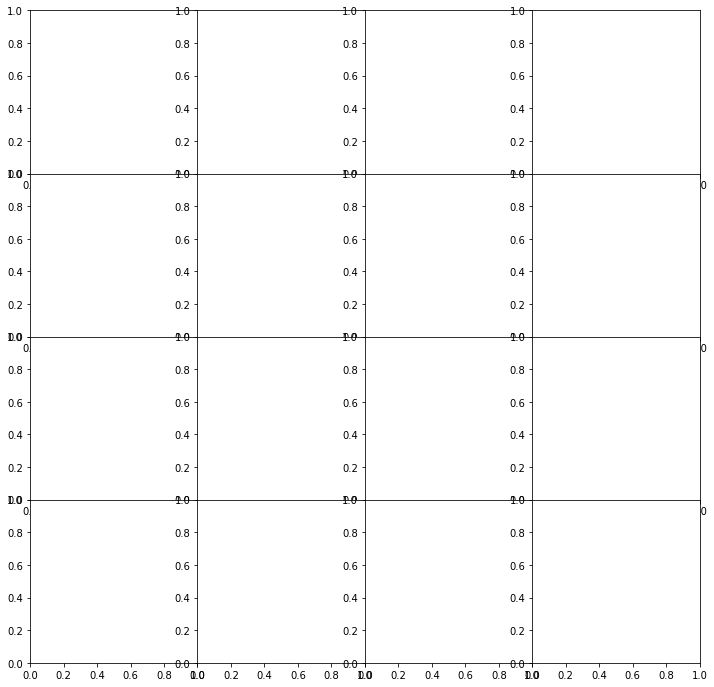

In [29]:
pd.plotting.scatter_matrix(df10[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
# plt.savefig('ri10p_scatter_matrix.pdf')